In [1]:
from GenomeSigInfer.nmf import NMFMatrixGenerator
from GenomeSigInfer.data import data_processing
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
SBS_folder = "../SBS/"
cosmic_path = "../../data/COSMIC_v3.4_SBS_GRCh37.txt"
signatures = 48
nmf_init = "None"
beta_loss = "frobenius"
NMF_folder = "../NMF/"
result_folder = "../results/"

In [3]:
matrix = pd.read_parquet(Path(SBS_folder) / "sbs.96.parquet")
all_genomes = np.array(matrix.iloc[:, 1:])
print(all_genomes)

[[ 0.  0.  0. ...  8. 35.  6.]
 [ 0.  0.  0. ...  2. 26.  2.]
 [ 0.  0.  0. ...  0. 19.  2.]
 ...
 [ 0.  0.  0. ...  3. 27.  1.]
 [ 0.  0.  0. ...  1. 29.  2.]
 [ 0.  0.  0. ...  0. 28.  1.]]


In [4]:
data_processing.Preprocessing(all_genomes).norm_genomes

array([[1.01966845e-05, 1.56335864e-05, 6.23971110e-05, ...,
        1.10000000e+01, 2.80000000e+01, 8.00000000e+00],
       [1.01966845e-05, 1.56335864e-05, 6.23971110e-05, ...,
        1.00000000e+00, 2.20000000e+01, 4.00000000e+00],
       [1.01966845e-05, 1.56335864e-05, 6.23971110e-05, ...,
        1.00000000e-04, 1.70000000e+01, 1.00000000e+00],
       ...,
       [1.01966845e-05, 1.56335864e-05, 6.23971110e-05, ...,
        6.00000000e+00, 3.30000000e+01, 1.00000000e+00],
       [1.01966845e-05, 1.56335864e-05, 6.23971110e-05, ...,
        1.00000000e-04, 3.50000000e+01, 1.00000000e+00],
       [1.01966845e-05, 1.56335864e-05, 6.23971110e-05, ...,
        1.00000000e-04, 2.60000000e+01, 2.00000000e+00]])

In [5]:
nmf_matrixgenerator = NMFMatrixGenerator.generate_nmf_matrix(SBS_folder, signatures, cosmic_path, nmf_init, beta_loss, NMF_folder, result_folder)

In [3]:
nmf_matrixgenerator.run_nmf_on_sbs_files()

2023-12-10 13:22:38 - INFO - Creating NMF files with 48 signatures
2023-12-10 13:22:38 - INFO - Performing NMF on '..\SBS\sbs.96.parquet'


2023-12-10 13:22:38 - INFO - Preprocessing the data
2023-12-10 13:22:40 - INFO - Fitting the model for size: 96
d:\Dev\stage\GenomeSigInfer\venv\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(
2023-12-10 13:24:44 - INFO - Done fitting
2023-12-10 13:24:44 - INFO - Written the results to '..\NMF\nmf.96.txt'
2023-12-10 13:24:45 - INFO - Written the results to '..\NMF\decompose.96.txt'
2023-12-10 13:24:45 - INFO - Performing NMF on '..\SBS\sbs.1536.parquet'
2023-12-10 13:24:46 - INFO - Preprocessing the data
2023-12-10 13:24:49 - INFO - Fitting the model for size: 1536
d:\Dev\stage\GenomeSigInfer\venv\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(
2023-12-10 13:33:28 - INFO - Done fitting
2023-12-10 13:33:28 - INFO - Written the results to '..\NMF

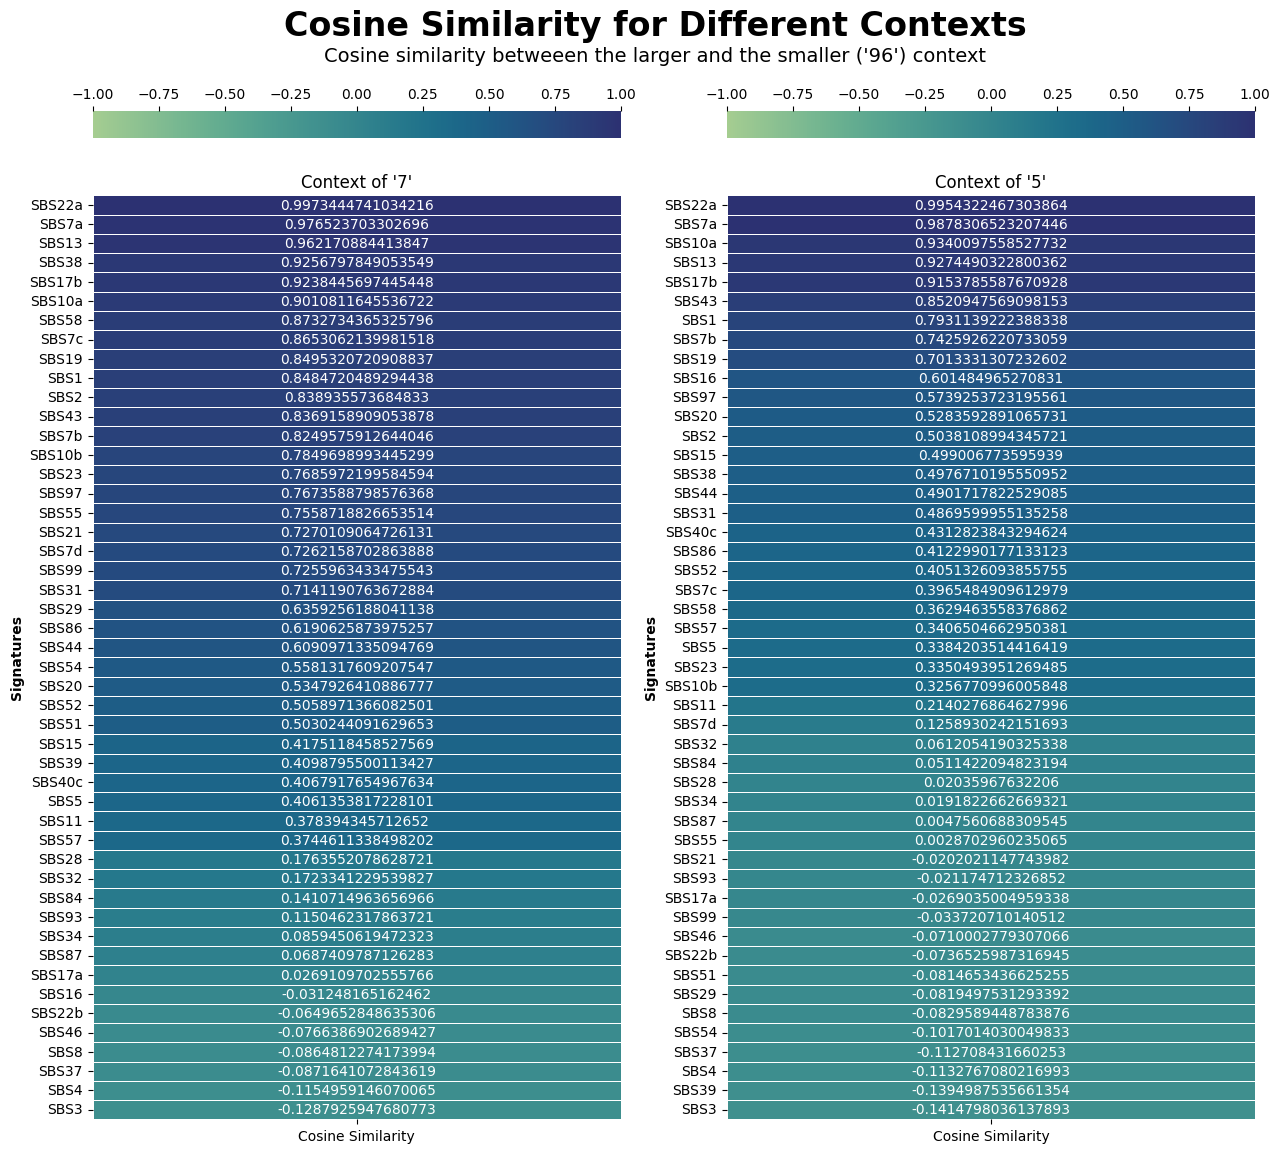

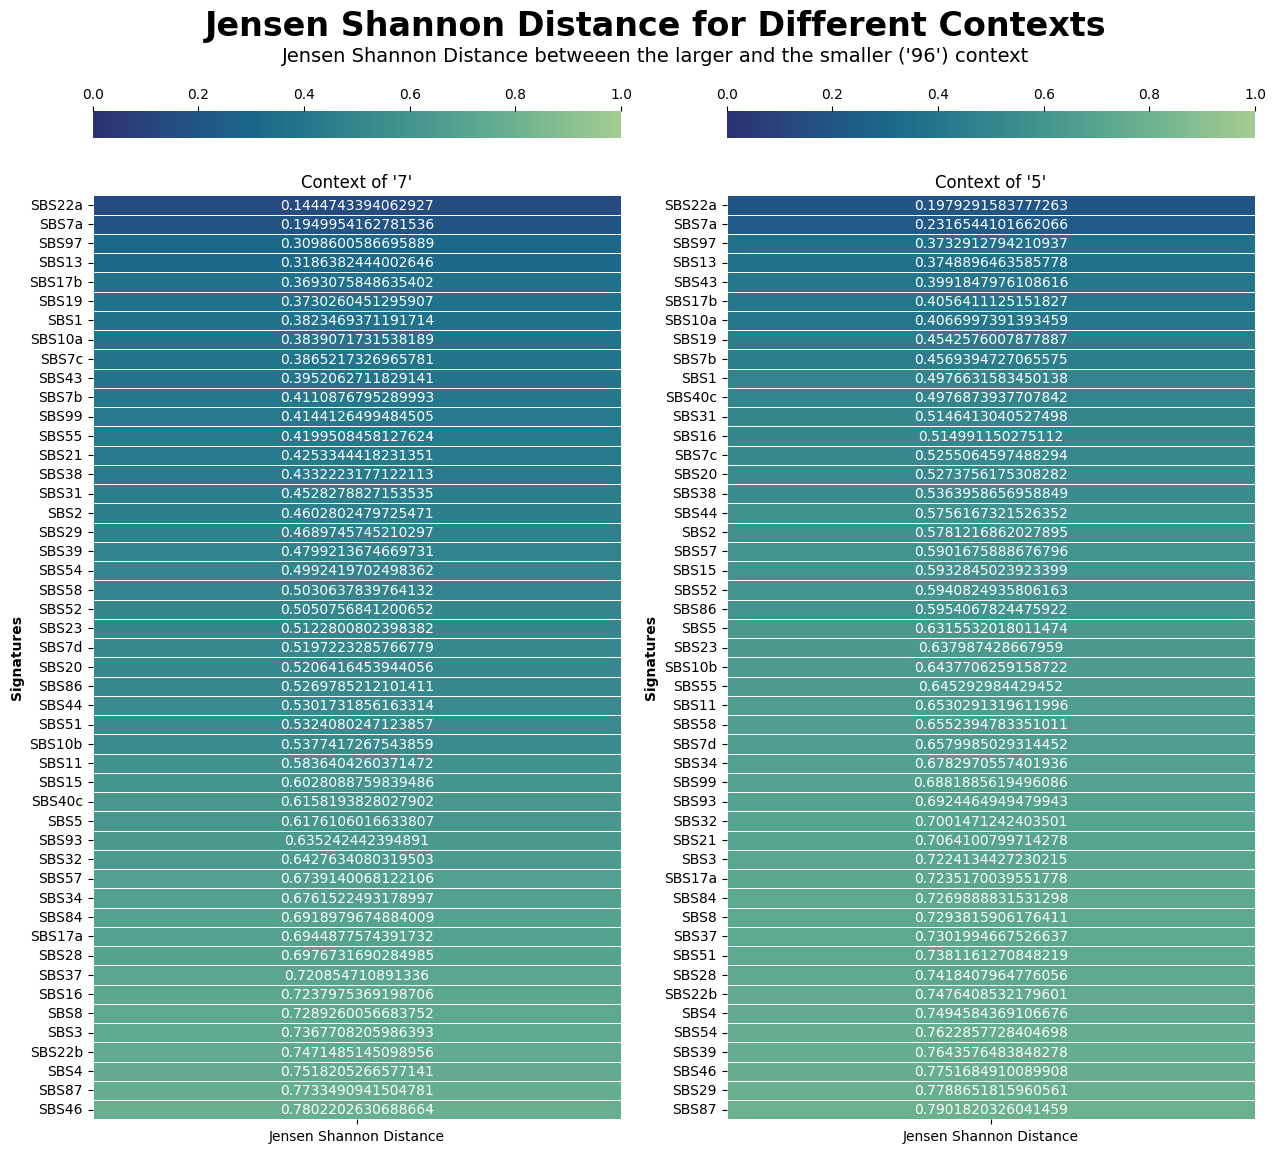

In [6]:
figure_folder = "../figures/"
nmf_matrixgenerator.create_distance_figures(figure_folder)